# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import r_regression

# Read Data

In [2]:
# Load the data set.  Use the CSV's first column as the dataframe's index
df = pd.read_csv("../data/toy_data.csv", index_col=0)

# Check data loaded correctly
df.head()

,x,y,type
0,-0.804458,0.320932,yes
1,-0.025483,0.644324,yes
2,-0.300797,0.389475,yes
3,-0.107437,-0.479983,yes
4,0.595036,-0.464668,yes


# Generate Training and Testing Data

While not true in all circumstances, the goal of many ML algorithms is to use the algorithm on new and unseen data at some point.  For this reason, it's important to test the algorithm on unseen data in order to verify its performance and whether or not it will be worthwhile to use.  

This leaves two options, either wait for a sufficient amount of new data to come in and use it to verify the model's accuracy, or parition your dataset into a training set and a testing set where the training set can be used to build the model and the testing set will only be used to verify the accuracy.  

While it would be reasonable to think that the more data points you have when training the model, the better its performance will be, there tend to be diminishing returns.  As it turns out, as long as your dataset is sufficiently large, performing a train/test split can yield quite good results and is by far the quickest option.

In [3]:
# Specify which column in the df is to be used as the input feature to the linear regression model
x_label = ['x']

# Identify which column is the output feature the model is trying to predict
y_label = ['y']

# Split dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(df[x_label].values,
                                                    df[y_label].values,
                                                    test_size=0.25,
                                                    random_state=42)

# Training Data

## Training the Linear Regression Model

A linear regression model can be used to predict a quantitative (numerical) output from a set of input features.  The model is capable of using 1 or more inputs, which can be either quantitative or qualitative (categorical), however for the sake of simplicity, this notebook will focus on a single quantitative input.  

In this form, the model will look like your friendly linear function from algebra class in high school: $$y=m \cdot x+b$$

However, because most datasets are incomplete, it's unlikely one will ever have enough information to create a linear model that's the most accurate representation of your data.  That being said, the goal isn't to go for exactness or perfection, but opt for estimation instead, which is why the model is more commonly written in this form: $$\hat y = \beta_1 \cdot x + \beta_0$$

where $\hat y$ represents the **predicted output** and $\beta_1$ and $\beta_0$ represent the **estimated** slope and **estimated** y-intercept, respectively.  

In [4]:
# Create linear regression object
lin_reg_model = linear_model.LinearRegression()

# Train the model using the training dataset
lin_reg_model = lin_reg_model.fit(X_train, y_train)

# The slope
slope = lin_reg_model.coef_
print(f"Slope: {slope}")

# The y-intercept
intercept = lin_reg_model.intercept_
print(f"y-intercept: {intercept}")

Slope: [[-0.40024179]]
y-intercept: [-0.58611954]


Based on the training data, the model has estimated the slope and y-intercept.  Using the values from above, the model will look like: $$\hat y = -0.40024179x - 0.58611954$$

The negative slope indicates a negative relationship between x and y, meaning when x is increased by 1, y decreases by 0.40024179.  The y-intercept signifies that when x is 0, y is estimated to be -0.58611954.

## Making Predictions

Now that the model has been trained, it can be used to make predictions.

In [5]:
# Make predictions using the already seen training data
training_predictions = lin_reg_model.predict(X_train)

# Store results in dataframe
train_results_df = pd.DataFrame({'x':X_train.flatten(), 
                                'y_true':y_train.flatten(), 
                                'y_predicted':training_predictions.flatten()})
train_results_df.head()

,x,y_true,y_predicted
0,-1.280853,0.107492,-0.073468
1,2.139055,-5.289533,-1.442259
2,0.052459,1.717348,-0.607116
3,-1.317657,0.675736,-0.058738
4,2.986229,-0.750801,-1.781333


Remembering the linear model from earlier, the train_results_df from above can be explained.  For the first entry, $x=-1.280853$.  Plugging this value into the model would look as follows: 
$$\hat y = -0.40024179x - 0.586119541$$
$$\hat y = -0.40024179(-1.20853) - 0.58611954$$
$$\hat y = -0.073468$$

The result is the predicted y value of -0.073468, however the true y value was $y=0.107492$.  Doing this for every x value leads to many $(x, \hat y)$ pairs, an x value and a *predicted* y value, which can then be graphed and compared to the $(x, y)$ pairs from the dataset itself, representing the x value and the *true* y value.

## Visualizing the Linear Model's Fit

In the graph below, each point on the red line represents the $(x, \hat y)$ pairs of predicted values, while the blue dots represent the $(x, y)$ pairs of the actal values from the dataset itself.  

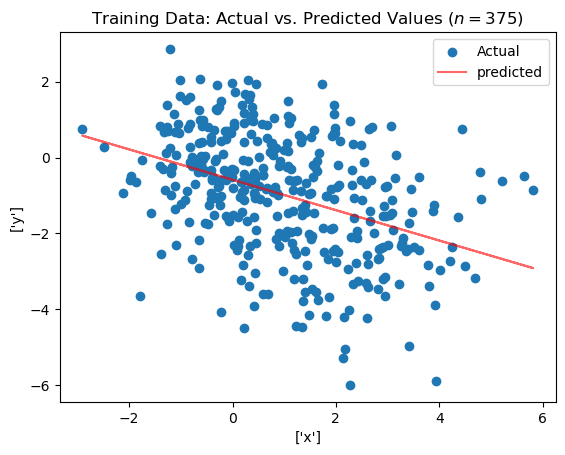

In [6]:
# Number of sample data points in training data
train_sample_size = X_train.shape[0]

# Create figure and axis for graphing
fig, ax = plt.subplots(1, 1)

# First axis - Scatter plot of training data and linear model's trend line
ax.scatter(X_train, y_train, label='Actual')
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title(f'Training Data: Actual vs. Predicted Values ($n={train_sample_size})$')
ax.plot(X_train, training_predictions, color='r', label='predicted', alpha=0.6)
ax.legend();

## Evaluating the strength of the relationship

The r-value, or correlation coefficient, represents the strength of the relationship between x and y.  Positive values represent a positive relationship, where an increase in x produces an increase in y, while negative values represent a negative relationship, where an increase in x represents a decrease in y.

The r-value also helps determine the "strength" of the relationship.  By design, r-values range from -1 to +1, with stronger values closer to -1 or +1 and weaker values closer to 0.

In [7]:
# The r-value (correlation coefficient)
train_r_value = r_regression(X_train, y_train.flatten())[0]
print(f"r-value (correlation coefficient): {train_r_value:.4f}")

r-value (correlation coefficient): -0.3949


In the training data, the r-value of -0.3949 indicates a weak negative correlation between x and y.

## Checking Error

With the linear regression model built and trained, it's time to start evaluating the model's performance.  First, performance should be evaluated on the training data.  Using the predictions from earlier, the residuals can be calculated, which represent the difference between the true y value and the predicted y value: $$\text{residual} = y - \hat y$$ 

This calculation yields the error in each prediction and is a way to evaluate the
performance of the model.  

In [8]:
# Calculate the error (residual) for each prediction
training_residuals = y_train - training_predictions

# Store results in dataframe
train_results_df = pd.DataFrame({'x':X_train.flatten(), 
                                'y_true':y_train.flatten(), 
                                'y_predicted':training_predictions.flatten(),
                                'residual':training_residuals.flatten()})
train_results_df.head()

,x,y_true,y_predicted,residual
0,-1.280853,0.107492,-0.073468,0.180961
1,2.139055,-5.289533,-1.442259,-3.847275
2,0.052459,1.717348,-0.607116,2.324464
3,-1.317657,0.675736,-0.058738,0.734474
4,2.986229,-0.750801,-1.781333,1.030532


Earlier, we plugged in $x=-1.280853$ to the model and it returned $\hat y = -0.073468$, the predicted y value, however the true y value was 0.107492.  To determine the error in the prediction, calculate the residual as follows:
$$\text{residual} = y - \hat y$$
$$\text{residual} = 0.107492 - (-0.073468)$$
$$\text{residual} = 0.180961$$

When $x=-1.280853$, the residual indicates the error in the prediction was 0.180961.  Essentially, the true y-value was 0.180961 above the prediction, or in other words, the model under predicted by 0.180961.

### Evaluating performance metrics

The root mean squared (RMSE) error represents the average amount of error in a prediction, therefore the lower the RMSE, the lower the error.  

The r2_score, otherwise known as the coefficient of determination, represents the percent of variation in y that is predictable by x. A value closer to 1 (100%) indicates that the model is using x to makes perfect predictions about y because x is the only piece of information needed to understand y.  On the other hand, a value of 0 (0%) indicates x has no relationship with y because x is meaningless in regards to understanding or predicting y.  In a case like that, a linear model between x and y would be useless since x and y have no relationship that can be used to make predictions.

In [9]:
# The root mean squared error
training_rmse = np.sqrt(mean_squared_error(y_train, training_predictions))
print(f"Root mean squared error: {training_rmse:.2f}")

# The r2_score, otherwise known as the coefficient of determination
training_r2_score = lin_reg_model.score(X_train, y_train)
print(f"r2 score (coefficient of determination): {training_r2_score*100:.2f}%")

Root mean squared error: 1.45
r2 score (coefficient of determination): 15.60%


On average, the model has an error of about 1.45 when make a prediction using training data.

Because the relationship between x and y in the training data is weak, x only explains about 15.60% of the changes seen in y.  While this seems low and is certainly far from ideal, it's often better than nothing.

## Visualizing the Linear Model's fit with Residuals

In addition to recreating the same graph from earlier showing the $(x, y)$ pairs of actual data values and the $(x, \hat y)$ pairs of predicted values, we can also create a scatter plot to visualize the residuals. The second graph shows the residuals and the focus should be around the line $y=0$, the line representing a residual of 0, or an error of 0 in the prediction.  The closer each residual is to that line, the less error in the prediction.

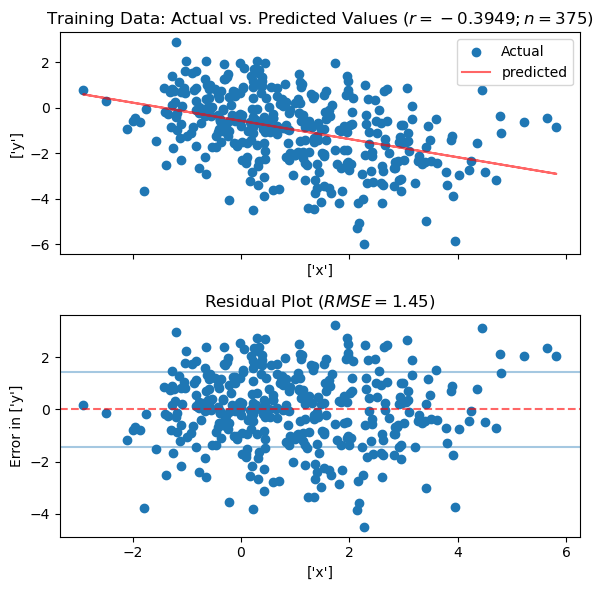

In [10]:
# Create figure and axis for graphing
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6,6))

# First axis - Scatter plot of training data and linear model's trend line
ax[0].scatter(X_train, y_train, label='Actual')
ax[0].set_xlabel(x_label)
ax[0].set_ylabel(y_label)
ax[0].set_title(f'Training Data: Actual vs. Predicted Values ($r={train_r_value:.4f}; n={train_sample_size})$')
ax[0].plot(X_train, training_predictions, color='r', label='predicted', alpha=0.6)
ax[0].legend()

# Second axis - Scatter plot of training residuals
ax[1].scatter(X_train, training_residuals, label='Actual')
ax[1].axhline(-training_rmse, alpha=0.4)
ax[1].axhline(training_rmse, alpha=0.4)
ax[1].axhline(0, color='r', linestyle='--', alpha=0.6)
ax[1].set_xlabel(x_label)
ax[1].set_ylabel(f'Error in {y_label}')
ax[1].set_title(f'Residual Plot ($RMSE={training_rmse:.2f})$')

plt.tight_layout()

The first scatter plot shows the linear model fits the dataset reasonably well, but is far from perfect.  Evidence of the r-value being negative can be seen because as x increases, y tends to decrease.  

The second scatter plot is that of the residuals.  Remember from earlier that a positive residual meant the model made an underprediction, therefore it stands to reason that a negative residual would be an overprediction.  There are roughly an equal amount of residuals above 0 as there are below 0, so the model is making about as many underpredictions as it makes overpredictions. 

Since most of the underpredictions and most of the overpredictions are centered around 1.45 or -1.45 respectively, a RMSE of 1.45 seems reasonable.  On average, a prediction by this model on testing data will have an error of about 1.45.

# Testing Data

The next step is to evaluate performance on testing data.  The performance here is far more important that before, because the goal of the model is to have good performance on new and unseen data.

## Evaluating the strength of the relationship

In [11]:
# The r-value (correlation coefficient)
test_r_value = r_regression(X_test, y_test.flatten())[0]
print(f"training r-value (correlation coefficient): {train_r_value:.4f}")
print(f"testing r-value (correlation coefficient): {test_r_value:.4f}")

training r-value (correlation coefficient): -0.3949
testing r-value (correlation coefficient): -0.3107


Like in the training dataset, the testing dataset also shows a weak negative relationship between x and y.

## Making Predictions and Checking Error

This time, the model will make predictions on testing data and then the residuals can be calculated.

In [12]:
# Make predictions using the "unseen" testing data
test_predictions = lin_reg_model.predict(X_test)

# Calculate the error (residual) for each prediction
test_residuals = y_test - test_predictions

# Store results in dataframe
test_results_df = pd.DataFrame({'x':X_test.flatten(), 
                                'y_true':y_test.flatten(), 
                                'y_predicted':test_predictions.flatten(),
                                'residual':test_residuals.flatten()})
test_results_df.head()

,x,y_true,y_predicted,residual
0,4.780198,-1.069815,-2.499354,1.429540
1,-1.259818,-0.665986,-0.081888,-0.584098
2,1.992976,-3.066610,-1.383792,-1.682819
3,0.462606,0.235474,-0.771274,1.006748
4,1.373428,-2.749678,-1.135823,-1.613855


Calculating residuals on the testing data is the same general process as before.  

For the first entry in the testing data, $x=4.780198$.  Plugging this value into the linear model would result in a prediction of $\hat y = -2.499354$.  Using the 
the true y value of $y=-1.069815$, the residual is calculated as 1.429540, meaning the model under predicted by 1.429540.

### Evaluating performance metrics

Now comes time to compare the performance on "unseen" testing data against the metrics from the "seen" training data.  It should be noted that performance metrics always perform worse on testing data than they do on training data and it's extremely normal to see more error on testing data.  Ideally, the testing metrics will be close to the training metrics because this indicates the model generalizes to the new data well enough to produce similar results.

In [13]:
# The root mean squared error
testing_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f"Training root mean squared error: {training_rmse:.2f}")
print(f"Testing root mean squared error: {testing_rmse:.2f}")
print()

# The r2_score, otherwise known as the coefficient of determination
testing_r2_score = lin_reg_model.score(X_test, y_test)
print(f"Training r2 score (coefficient of determination): {training_r2_score*100:.2f}%")
print(f"Testing r2 score (coefficient of determination): {testing_r2_score*100:.2f}%")

Training root mean squared error: 1.45
Testing root mean squared error: 1.60

Training r2 score (coefficient of determination): 15.60%
Testing r2 score (coefficient of determination): 8.15%


As expected, the model produces more error when evaluated on the testing data, which is why the RMSE for testing data is higher, albeit just slightly.  

The r2 score has dropped significantly though and now x only explains about 8% of the change in y.  In general, both the RMSE and r2 score indicate poor performance overall; x just isn't that great a predictor of y.

## Visualizing the Training Model against the Testing Model

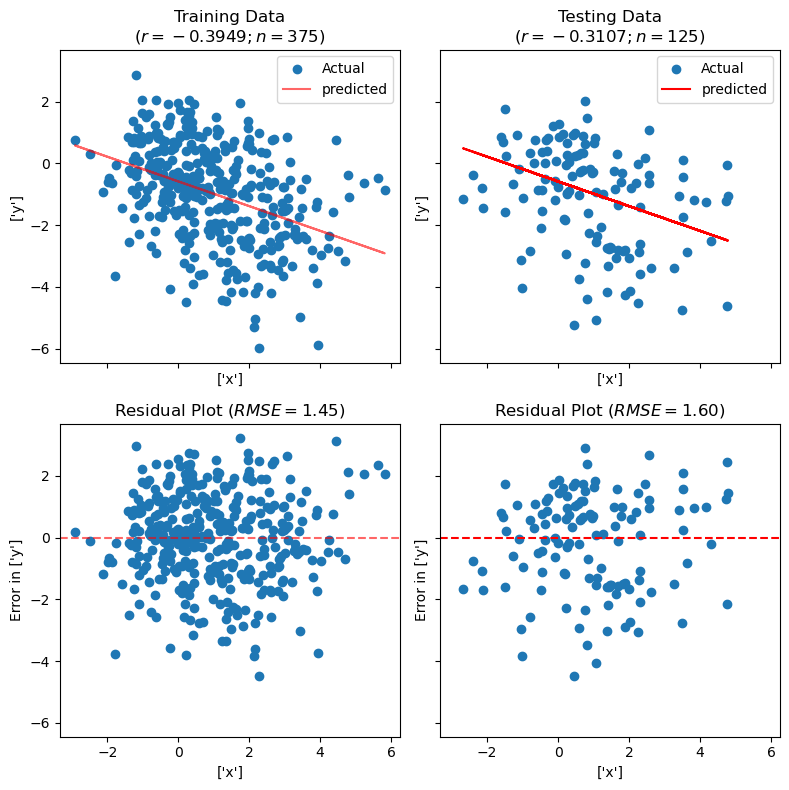

In [14]:
test_sample_size = X_test.shape[0]

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,8))

# Graphing Training Data

## Top left axis - Scatter plot of training data and linear model's trend line
ax[0,0].scatter(X_train, y_train, label='Actual')
ax[0,0].set_xlabel(x_label)
ax[0,0].set_ylabel(y_label)
ax[0,0].set_title(f'Training Data\n($r={train_r_value:.4f}; n={train_sample_size})$')
ax[0,0].plot(X_train, training_predictions, color='r', label='predicted', alpha=0.6)
ax[0,0].legend()

## Bottom left axis - Scatter plot of training residuals
ax[1,0].scatter(X_train, training_residuals, label='Actual')
ax[1,0].axhline(0, color='r', linestyle='--', alpha=0.6)
ax[1,0].set_xlabel(x_label)
ax[1,0].set_ylabel(f'Error in {y_label}')
ax[1,0].set_title(f'Residual Plot ($RMSE={training_rmse:.2f})$')

# Graphing Testing Data
## Top right axis - Scatter plot of testing data and linear model's trend line
ax[0,1].scatter(X_test, y_test, label='Actual')
ax[0,1].set_xlabel(x_label)
ax[0,1].set_ylabel(y_label)
ax[0,1].set_title(f'Testing Data\n($r={test_r_value:.4f}; n={test_sample_size})$')
ax[0,1].plot(X_test, test_predictions, color='r', label='predicted')
ax[0,1].legend()

## Bottom right axis - Scatter plot of testing residuals
ax[1,1].scatter(X_test, test_residuals, label='Actual')
ax[1,1].axhline(0, color='r', linestyle='--')
ax[1,1].set_xlabel(x_label)
ax[1,1].set_ylabel(f'Error in {y_label}')
ax[1,1].set_title(f'Residual Plot ($RMSE={testing_rmse:.2f})$')

plt.tight_layout()

Visually, the performance between both models appears similar, which is in line with what was seen in the performance metrics.  

# Conclusion

While the model had poor performance on both training and testing data, it's still better than than no model at all.  However, the r2_scores indicate that x isn't a great predictor of y and any model built trying to make predictions for that relationship will be inherently flawed.  Other features should be explored to find ones that have a stronger relationship with y.

In practice, it's quite difficult to get the model right on the first try, which is why feature selection and model evaluation are so important.  In many cases, one may need to build many models with different features and each model's performance needs to be evaluated against the others to determine which one produces the best results.  